In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def lif(p):

    tau = p[0]
    R = p[1]
    I = 1
    dt = 0.01
    deltaT = 4
    VT = -50
    E = -70
    VspikeThreshold = -20
    Vreset = -70

    V = np.zeros((10000)); V[0] = -70
    W = np.zeros((10000)); W[0] = 100

    for nn in range(10000-1):
        dV = (E - V[nn] + deltaT*np.exp((V[nn]-VT)/deltaT) + R*I)/tau * dt
        V[nn+1] = (V[nn] + dV)
        if V[nn+1] > VspikeThreshold:
            V[nn+1] = Vreset
    return V

In [107]:
V_base = lif([10, 25])

In [133]:
import array
import random

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_int", random.randint, 0, 100)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalFunc(individual, V=None):
    V_tmp = lif(individual)
    error = float(np.abs(np.sum(V_tmp - V) / 10000))
    return (error,)

toolbox.register("evaluate", evalFunc, V=V_base)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


random.seed(64)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=25, 
                                stats=stats, halloffame=hof, verbose=True)

C:\Users\tren_ax\AppData\Roaming\Python\Python37\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\tren_ax\AppData\Roaming\Python\Python37\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\tren_ax\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


gen	nevals	avg    	std    	min        	max   
0  	300   	3.05851	4.29689	0.000244693	15.864
1  	169   	1.19239	2.701  	0.000244693	15.864
2  	181   	0.767063	1.80968	0.000244693	15.864
3  	180   	0.798632	2.26711	0.000244693	15.864
4  	177   	0.842955	2.28181	0.000244693	15.864
5  	176   	0.782823	2.21638	0.000244693	15.864
6  	170   	0.88978 	2.67938	0.000244693	15.864
7  	171   	0.542199	1.59565	0.000244693	15.864
8  	184   	0.667998	2.27647	0.000244693	15.864
9  	167   	0.612941	2.24765	0.000244693	15.864
10 	180   	0.467168	2.04897	0.000244693	15.864
11 	190   	0.463468	2.23354	0.000244693	15.864
12 	183   	0.323725	2.04007	0.000244693	15.864
13 	165   	0.423179	2.55516	0.000244693	15.864
14 	192   	0.317386	2.21999	0.000244693	15.864
15 	180   	0.264541	2.0301 	0.000244693	15.864
16 	192   	0.264541	2.0301 	0.000244693	15.864
17 	180   	0.581783	2.98079	0.000244693	15.864
18 	165   	0.158849	1.57809	0.000244693	15.864
19 	174   	0.10597 	1.29054	0.000244693	15.864
20 	172   	0.475

array('b', [98, 89])


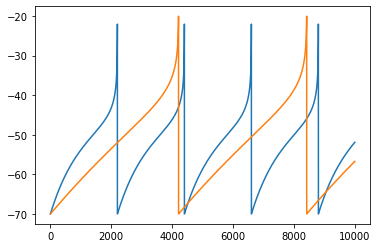

In [140]:
#print(pop)

V_opt = lif(hof[0][:])
print(hof[0][:])
plt.plot(V_base)
plt.plot(V_opt)